In [ ]:
!pip install --upgrade langchain
!pip install --upgrade langchain-core
!pip install --upgrade langchain-community
!pip install --upgrade langchain-google-genai

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
# help(ChatGoogleGenerativeAI)

In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('RIITAM_TITO_KEY'))
messages = [
    SystemMessage(content="You're an assistant knowledgeable about sports. Only answer sport-related questions."),
    HumanMessage(content="Who is Lionel Messi?"),
]
result = chat_model.invoke(messages)

print(result.content)

Lionel Messi is an Argentine professional footballer widely regarded as one of the greatest players of all time.

Here are some key facts about him:

*   **Position:** He primarily plays as a forward or an attacking midfielder.
*   **Club Career:** He spent the vast majority of his club career (2004-2021) with FC Barcelona, where he achieved unprecedented success, winning numerous La Liga titles, Copa del Reys, and four UEFA Champions League titles. He later played for Paris Saint-Germain (2021-2023) and currently plays for Inter Miami CF in Major League Soccer (MLS).
*   **International Career:** He has captained the Argentina national team, leading them to victory in the 2021 Copa América and, most notably, the 2022 FIFA World Cup.
*   **Awards:** Messi has won a record eight Ballon d'Or awards, given to the best male footballer in the world, more than any other player in history. He also holds numerous scoring records for both club and country.
*   **Playing Style:** He is known for

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions. Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}

Question: {question}
"""

review_template = ChatPromptTemplate.from_template(instruction_str)

# 3. Define the context and question
context = "The discharge process was seamless!"

question = "Did anyone have a positive experience?"

# 4. Create the chain by piping the components together
#    We also add an output parser to get a clean string result.
chain = review_template | chat_model | StrOutputParser()

# 5. Invoke the chain with the input variables
result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

Yes, a patient had a positive experience. They specifically mentioned that "The discharge process was seamless!"


In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import (
    PromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)
from langchain_core.output_parsers import StrOutputParser
instruction_str = """Your job is to use customer reviews to answer questions about their experience at a five star hotel.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}
"""
review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"], template=instruction_str
    )
)
review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"], template="{question}"
    )
)
messages = [review_system_prompt, review_human_prompt]

review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=messages,
)

context = "I had a great stay at Hyatt Regencies!"
question = "Did anyone have a positive experience?"

chain = review_prompt_template | chat_model | StrOutputParser()

result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

Yes, one person stated, "I had a great stay at Hyatt Regencies!"


In [ ]:
!pip install -U langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.7 MB/s eta 0:

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import time
from google.colab import userdata

# Import the CSVLoader class to load documents from a CSV file.
from langchain_community.document_loaders.csv_loader import CSVLoader

# Import the Chroma class, which is used to create and interact with a Chroma vector database.
from langchain_chroma import Chroma

# Import the GoogleGenerativeAIEmbeddings class to create numerical vector representations (embeddings) of text using Google's models.
from langchain_google_genai import GoogleGenerativeAIEmbeddings


REVIEWS_CSV_PATH = "/content/data/MyDrive/Datasets/HOTEL_REVIEWS.csv"

# Define a constant variable for the directory where the Chroma vector database will be stored.
REVIEWS_CHROMA_PATH = "chroma_data"


# Create an instance of the CSVLoader.
loader = CSVLoader(
    file_path=REVIEWS_CSV_PATH,  # Specify the path to the CSV file to be loaded.
    source_column="context"       # Specify the name of the column that contains the main text content.
)

# Call the .load() method on the loader instance.
# This reads the specified column from the CSV file and loads the content into a list of Document objects.
reviews = loader.load()

# Specify the embedding function to use. We define it once to be reused.
embedding_function = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",  # Choose the specific embedding model provided by Google.
    google_api_key=userdata.get('RIITAM_TITO_KEY')  # Securely fetch the Google API key.
)

batch_size = 5
num_batches = (len(reviews) - 1) // batch_size + 1
reviews_vector_db = None

for i in range(0, len(reviews), batch_size):
    # Get the current batch of documents.
    batch_docs = reviews[i:i + batch_size]
    current_batch_num = i // batch_size + 1

    print(f"Processing batch {current_batch_num}/{num_batches}...")

    if i == 0:
        # For the first batch, create a new Chroma vector database.
        # The `from_documents` method handles the entire process of embedding and storing the data.
        reviews_vector_db = Chroma.from_documents(
            documents=batch_docs,  # Pass the list of Document objects that need to be embedded.
            embedding=embedding_function,
            # Specify the directory on the disk where the vector database will be saved.
            # This makes the database persistent, so we can load it directly in the future.
            persist_directory=REVIEWS_CHROMA_PATH
        )
    else:
        # For subsequent batches, add the documents to the existing database.
        reviews_vector_db.add_documents(documents=batch_docs)

    # Pause the script for 30 seconds after each batch to respect the per-minute rate limit.
    print(f"Batch {current_batch_num} processed. Waiting for 30 seconds...")
    time.sleep(30)

print("Vector database created successfully and saved to the specified directory.")

Processing batch 1/4...
Batch 1 processed. Waiting for 30 seconds...
Processing batch 2/4...
Batch 2 processed. Waiting for 30 seconds...
Processing batch 3/4...
Batch 3 processed. Waiting for 30 seconds...
Processing batch 4/4...
Batch 4 processed. Waiting for 30 seconds...
Vector database created successfully and saved to the specified directory.


In [ ]:
question = """Has anyone complained about the hotel staff?"""
relevant_info = reviews_vector_db.similarity_search(question, k=3)

relevant_info[0].page_content

'review_id: 16\ncontext: The front desk staff were polite but check-out took longer than expected.\nquestion: How was the check-out process?\nexpected_answer: Check-out took longer than expected.'

In [ ]:
relevant_info[1].page_content

'review_id: 10\ncontext: The staff helped me book a local tour and were very helpful.\nquestion: How was the staff helpfulness?\nexpected_answer: The staff were very helpful.'

In [ ]:
relevant_info[2].page_content

'review_id: 1\ncontext: The hotel staff were extremely courteous and the room was spotless. The check-in process was smooth and quick.\nquestion: How was the cleanliness of the room?\nexpected_answer: The room was spotless.'

In [ ]:
from langchain_core.runnables import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string

# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# The `as_retriever` method converts the database into a retriever.
# `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the Gemini chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

In [ ]:
question = """Has anyone complained about communication with the hotel staff?"""
review_chain.invoke(question)

'No, according to the provided reviews, there are no complaints about communication with the hotel staff. In fact, the front desk staff were described as "polite" and the hotel staff were "extremely courteous" and "very helpful."'

In [ ]:
from langchain_core.prompts import (
    PromptTemplate,  # Template for formatting prompts with dynamic variables
    SystemMessagePromptTemplate,  # Represents a system-level instruction to the model
    HumanMessagePromptTemplate,  # Represents a human-level input for the model
    ChatPromptTemplate,  # Combines multiple prompt components into a unified chat prompt
)

# Define the system prompt template as a string with placeholders for dynamic content
review_template_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

# Create a system-level message prompt template for the chatbot
review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"],  # Placeholder for the "context" (e.g., patient reviews)
        template=review_template_str,  # The instructions and structure of the system prompt
    )
)

# Create a human-level message prompt template for user input
review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"],  # Placeholder for the "question" to be answered
        template="{question}",  # A simple template where the "question" is dynamically inserted
    )
)

# Combine the system and human prompts into a list of messages
messages = [review_system_prompt, review_human_prompt]

# Create a chat prompt template that integrates the system and human prompts
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],  # Define the expected inputs for the template
    messages=messages,  # Combine the individual prompt components (system and human)
)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import (
    PromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate,
)
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string
from langchain_community.vectorstores import Chroma  # Vector database for efficient similarity searches
from langchain_google_genai import GoogleGenerativeAIEmbeddings  # Converts text to embeddings using Google's API
from langchain_core.runnables import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline

# Path to the persistent Chroma vector database
REVIEWS_CHROMA_PATH = "chroma_data_v2"

# Specify the embedding function to use. We define it once to be reused.
embedding_function = GoogleGenerativeAIEmbeddings(
    model="models/text-embedding-004",  # Choose the specific embedding model provided by Google.
    google_api_key=userdata.get('RIITAM_TITO_KEY')  # Securely fetch the Google API key.
)

# Set the size of each batch to process.
batch_size = 5
# Calculate the total number of batches.
num_batches = (len(reviews) - 1) // batch_size + 1
reviews_vector_db = None

# Loop through the documents in batches to avoid hitting the API's rate limit.
for i in range(0, len(reviews), batch_size):
    # Get the current batch of documents.
    batch_docs = reviews[i:i + batch_size]
    current_batch_num = i // batch_size + 1

    print(f"Processing batch {current_batch_num}/{num_batches}...")

    if i == 0:

        reviews_vector_db = Chroma.from_documents(
            documents=batch_docs,
            embedding=embedding_function,
            persist_directory=REVIEWS_CHROMA_PATH
        )
    else:
        reviews_vector_db.add_documents(documents=batch_docs)

    print(f"Batch {current_batch_num} processed. Waiting for 30 seconds...")
    time.sleep(30)

print("Vector database created successfully and saved to the specified directory.")

Processing batch 1/4...
Batch 1 processed. Waiting for 30 seconds...
Processing batch 2/4...
Batch 2 processed. Waiting for 30 seconds...
Processing batch 3/4...
Batch 3 processed. Waiting for 30 seconds...
Processing batch 4/4...
Batch 4 processed. Waiting for 30 seconds...
Vector database created successfully and saved to the specified directory.


In [ ]:
reviews_vector_db = Chroma(persist_directory=REVIEWS_CHROMA_PATH, embedding_function=embedding_function)

/tmp/ipython-input-3426601912.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.
  reviews_vector_db = Chroma(persist_directory=REVIEWS_CHROMA_PATH, embedding_function=embedding_function)


In [ ]:
# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# The `as_retriever` method converts the database into a retriever.
# `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the OpenAI chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

In [ ]:
question = """Has anyone complained about communication with the hotel staff?"""
review_chain.invoke(question)

"I don't know. The provided reviews do not contain any complaints about communication with the hotel staff."

In [ ]:
!pip install gradio

In [ ]:
def respond_to_user_question(question: str, history: list) -> str:
    """
    Respond to a user's question using the review_chain.
    """
    return review_chain.invoke(question)

In [ ]:
respond_to_user_question("Has anyone complained about the hotel staff?", [])

'No, based on the provided reviews, no one has complained about the hotel staff. In fact, the hotel staff were described as "extremely courteous" in one review and the front desk staff were noted as "polite" in another. The only complaint was about the check-out process taking longer than expected, not about the staff themselves.'

In [ ]:
import gradio as gr
# Create the Gradio ChatInterface
interface = gr.ChatInterface(fn=respond_to_user_question, title="Review Helper Bot")

# Launch the Gradio app
interface.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:347: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://434a69f2a6ebbd781c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://434a69f2a6ebbd781c.gradio.live


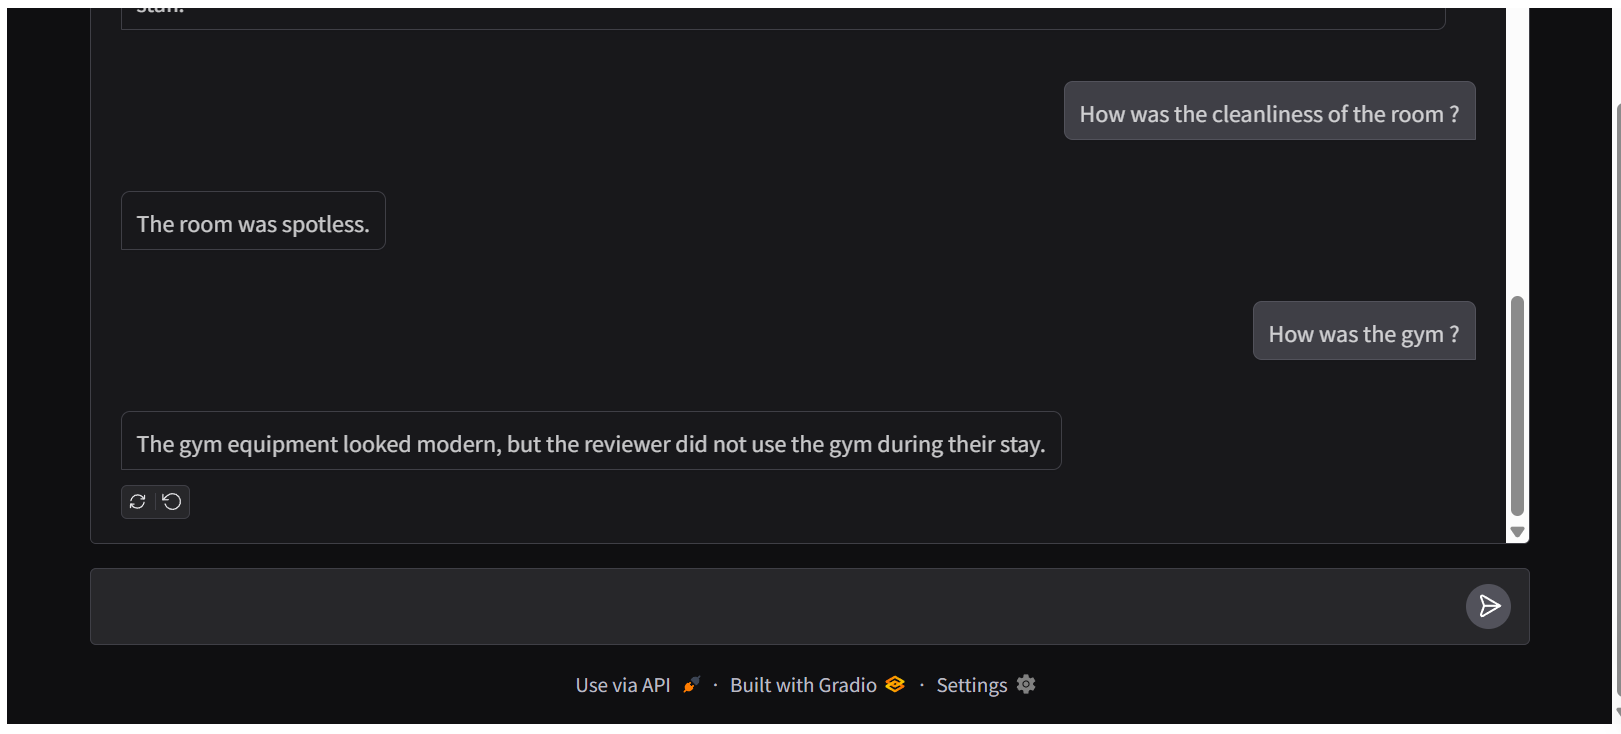

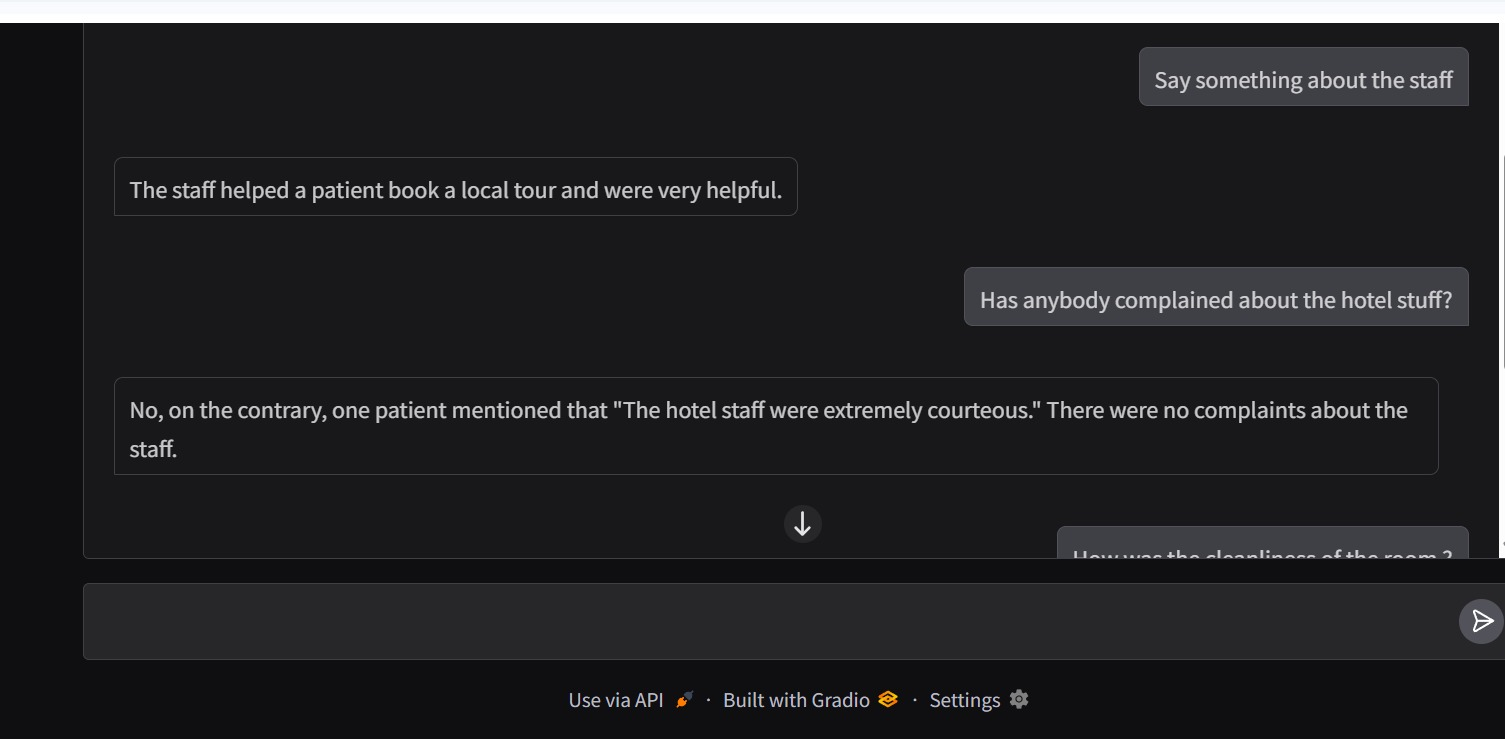